# Desafío 1: Análisis exploratorio y limpieza de datos
### Dataset Properati
### Mariano Malagrino, Pamela Martínez, Cristian Gabriel Torres

 ### Importamos librerias necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import geopandas as gpd

### Cargando dataset de propiedades

En primer lugar vamos a leer la información del archivo de propiedades, ver qué campos contiene y el tipo de información de cada uno.

In [2]:
#location = "../TP1/properatti.csv"
location = 'properatti.csv'
data = pd.read_csv(location, index_col=0)
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


### Exploración de datos

Vemos qué forma tiene el dataset que acabamos de cargar. Para eso vamos a utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [3]:
print('Filas del data: ', data.shape[0])
print('Columnas del data: ', data.shape[1])

Filas del data:  121220
Columnas del data:  25


Nos interesa entender el tipo de dato de cada columna

In [4]:
data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

---
## Removiendo columnas innecesarias

In [5]:
# Vemos que los precios se manejan con el mismo índice de conversion de U$D 1 = AR$ 17,64
# La cantidad de nulos de los precios en ambas monedas es igual, por lo que podemos eliminar
# columnas y solo dejar la columna en dolares.
data["conversion"] = data["price_aprox_local_currency"] / data["price_aprox_usd"]
print(data.conversion.max())
print(data.conversion.min())
print(data.conversion.mean())

17.6445
17.644498249101435
17.644499988448175


In [6]:
data = data.drop(axis=1, columns=["operation",
                                  "country_name",
                                  "geonames_id",
                                  "price",
                                  "lat-lon",
                                  "currency",
                                  "price_aprox_local_currency",
                                  "image_thumbnail",
                                  "conversion"])

In [7]:
data.rename(columns={'price_aprox_usd': 'price'}, inplace=True)

In [8]:
data.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


---
## Geo Pandas

Eliminamos las propiedades que no tienen ubicaciones geaograficas para poder generar el GeoDataFrame

In [9]:
lat_mask = data.lat.notnull()
df_para_geo = data[lat_mask]
print(df_para_geo.loc[:,["lat", "lon"]].isnull().sum() / df_para_geo.shape[0] * 100)
# verificamos que no tenemos ubicaiones nulas
df_para_geo.to_csv('df_para_geo.csv')
# Guardamos el archivo para explorarlo mejor en otra hoja

lat    0.0
lon    0.0
dtype: float64


In [10]:
geometria = gpd.points_from_xy(df_para_geo.lon, df_para_geo.lat)
geo_data = gpd.GeoDataFrame(df_para_geo, geometry=geometria)
geo_data.loc[:, ['geometry', 'lat', 'lon', 'place_name']].sample(3)

,geometry,lat,lon,place_name
14718,POINT (-57.99897 -34.93161),-34.931612,-57.998972,La Plata
20166,POINT (-57.54724 -38.01727),-38.017274,-57.547240,Mar del Plata
39107,POINT (-58.64321 -34.45175),-34.451755,-58.643214,Barrancas de San Jose


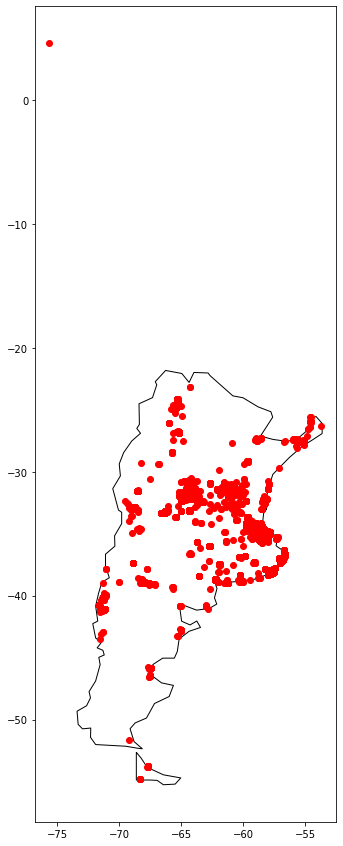

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
argentina = world[world.name=="Argentina"]

ax = argentina.plot(color='white', edgecolor='black', figsize=(10,15))

geo_data.plot(ax=ax, color='red')

plt.show()

Vemos un claro outlier, que eliminaremos

In [12]:
geo_data.loc[:,["lat", "lon"]].sort_values(by= "lat", ascending=False).head(3)

,lat,lon
9761,4.545843,-75.678931
38424,-23.137164,-64.313237
38423,-23.137164,-64.313237


In [13]:
print(geo_data.shape)
mask = geo_data["lat"] < -20
geo_data = geo_data[mask]
print(geo_data.shape)

(69670, 18)
(69669, 18)


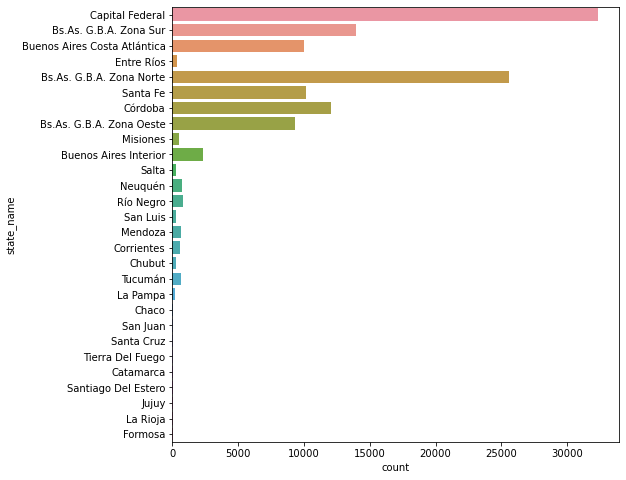

In [14]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data = data, y = "state_name")

Observamos que las mayores cantidades de datos están en:
- Capital Federal
- Bs.As. G.B.A. Zona Norte
- Bs.As. G.B.A. Zona Sur
- Bs.As. G.B.A. Zona Oeste
- Buenos Aires Costa Atlántica
- Córdoba
- Santa Fe

Las demás áreas son poco representativas, así que no las vamos a considerar, pero vamos a estudiar mas profundamente las que seleccionamos

(5121, 18)


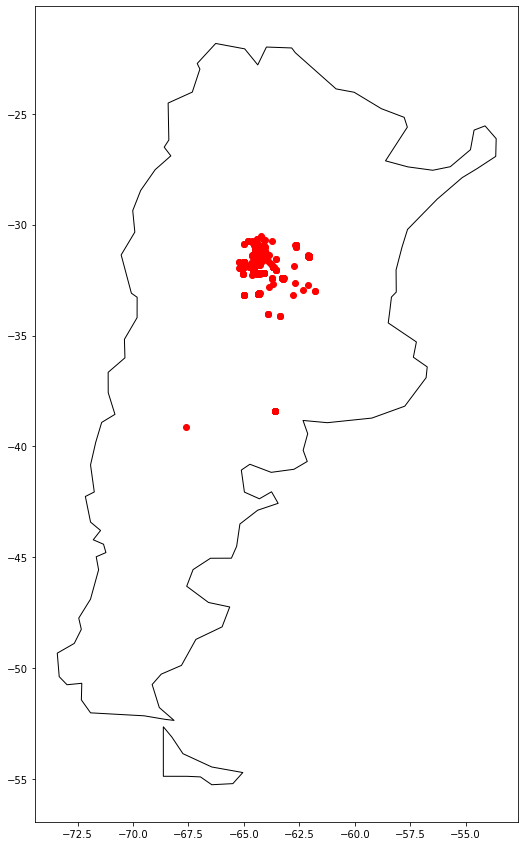

In [15]:
geo_cba_mask = geo_data["state_name"] == "Córdoba"
geo_cba = geo_data[geo_cba_mask]

ax = argentina.plot(color='white', edgecolor='black', figsize=(10,15))

geo_cba.plot(ax=ax, color='red')
print(geo_cba.shape)
plt.show()

(5381, 18)


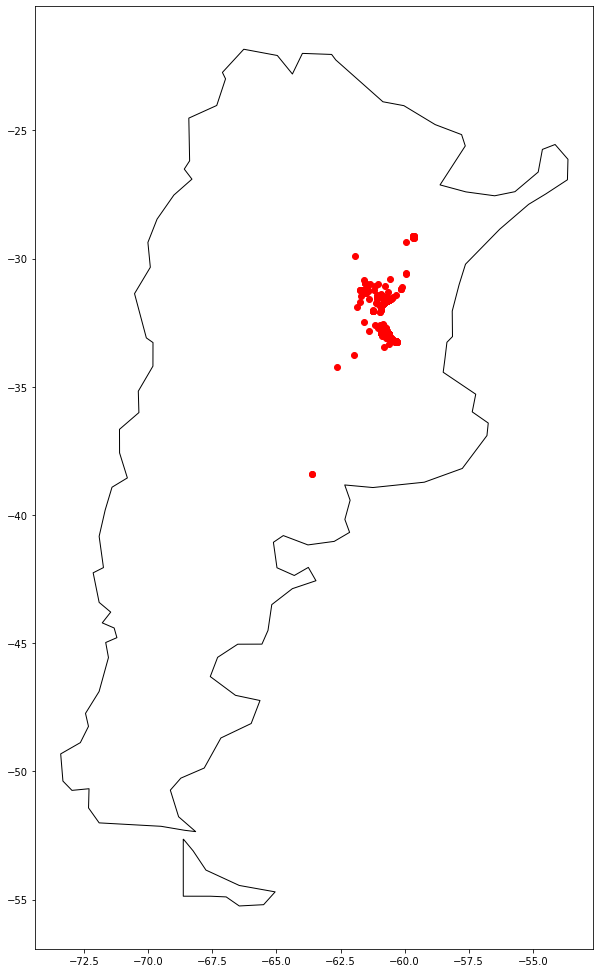

In [16]:
geo_st_fe_mask = geo_data["state_name"] == "Santa Fe"
geo_st_fe = geo_data[geo_st_fe_mask]

ax = argentina.plot(color='white', edgecolor='black', figsize=(10,20))

geo_st_fe.plot(ax=ax, color='red')
print(geo_st_fe.shape)
plt.show()

(8205, 18)


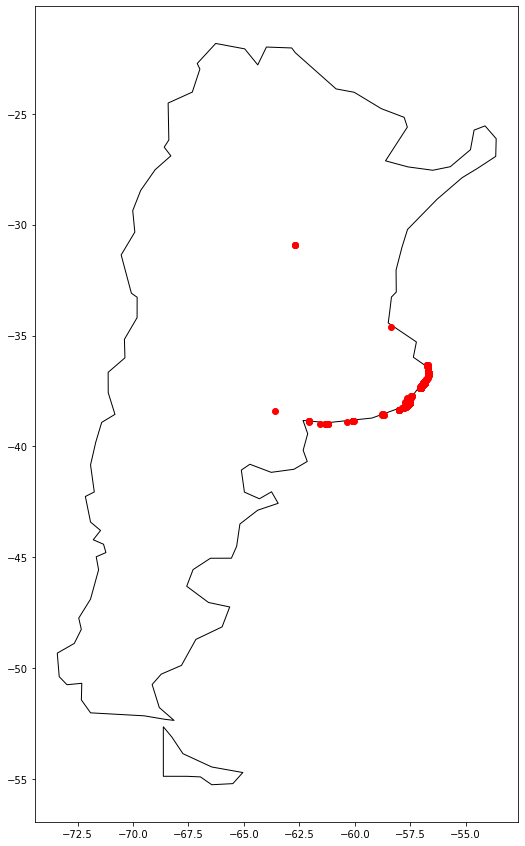

In [17]:
geo_costa_mask = geo_data["state_name"] == "Buenos Aires Costa Atlántica"
geo_costa = geo_data[geo_costa_mask]

ax = argentina.plot(color='white', edgecolor='black', figsize=(10,15))

geo_costa.plot(ax=ax, color='red')
print(geo_costa.shape)
plt.show()

(46794, 18)


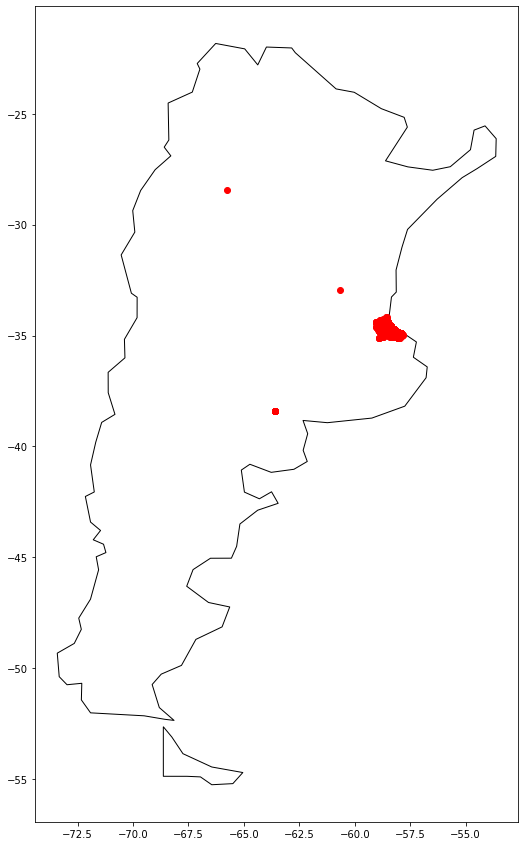

In [18]:
geo_caba_mask = ((geo_data["state_name"] == "Capital Federal") |
                 (geo_data["state_name"] == "Bs.As. G.B.A. Zona Norte") |
                 (geo_data["state_name"] == "Bs.As. G.B.A. Zona Sur") |
                 (geo_data["state_name"] == "Bs.As. G.B.A. Zona Oeste"))
geo_caba = geo_data[geo_caba_mask]

ax = argentina.plot(color='white', edgecolor='black', figsize=(10,15))

geo_caba.plot(ax=ax, color='red')
print(geo_caba.shape)
plt.show()

Vemos que tenemos una gran cantidad de datos en una area muy reducida, a excepción de unos outlayers, por lo que decidimos quedarnos con estas 4 zonas de Buenos Aires, para poder realizar una prediccíon mas precisa

In [19]:
geo_caba.loc[:,["lat", "lon", "state_name"]].sort_values(by= "lon").head(15)

,lat,lon,state_name
7780,-28.442642,-65.765694,Bs.As. G.B.A. Zona Sur
32304,-38.416097,-63.616672,Bs.As. G.B.A. Zona Sur
28512,-38.416097,-63.616672,Capital Federal
101565,-38.416097,-63.616672,Bs.As. G.B.A. Zona Sur
50407,-38.416097,-63.616672,Bs.As. G.B.A. Zona Sur
29289,-38.416097,-63.616672,Bs.As. G.B.A. Zona Norte
52631,-38.416097,-63.616672,Bs.As. G.B.A. Zona Sur
5616,-38.416097,-63.616672,Bs.As. G.B.A. Zona Oeste
38005,-38.416097,-63.616672,Bs.As. G.B.A. Zona Norte
125,-38.416097,-63.616672,Bs.As. G.B.A. Zona Sur


In [20]:
print(geo_caba.shape)
mask = geo_caba["lon"] > -60
geo_caba = geo_caba[mask]
print(geo_caba.shape)

(46794, 18)
(46780, 18)


(46780, 18)


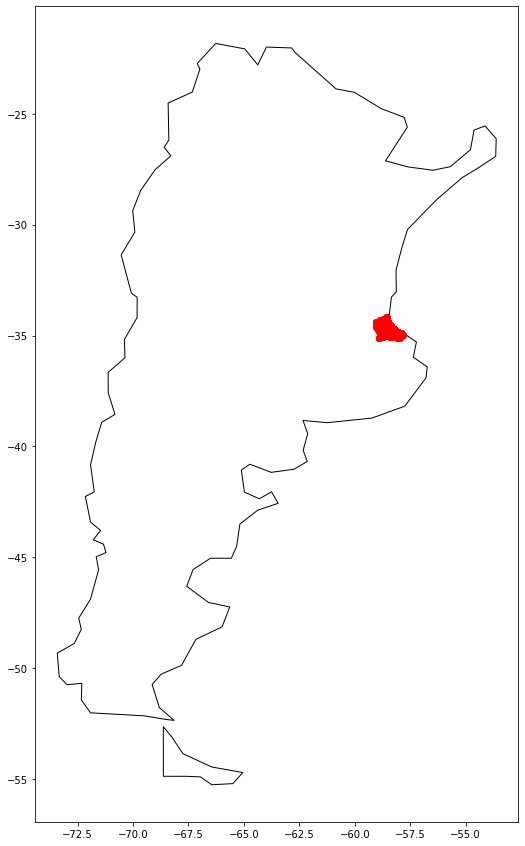

In [21]:
ax = argentina.plot(color='white', edgecolor='black', figsize=(10,15))

geo_caba.plot(ax=ax, color='red')
print(geo_caba.shape)
plt.show()

- Quitamos los outliers y las ubicaciones poco representativas del data set

In [22]:
caba_mask = ((data["state_name"] == "Capital Federal") |
             (data["state_name"] == "Bs.As. G.B.A. Zona Norte") |
             (data["state_name"] == "Bs.As. G.B.A. Zona Sur") |
             (data["state_name"] == "Bs.As. G.B.A. Zona Oeste"))
data = data[caba_mask]
data.shape

(81150, 17)

- Vemos las nuevas dimensiones del dataset luego de removidas las ciudades antes mencionadas

In [23]:
print(data.shape)
mask = ((data["lon"] > -60) | (data["lon"].isnull()))
data = data[mask]
print(data.shape)

(81150, 17)
(81136, 17)


---
### Visualizando las categorías

Visualizamos las categorias por tipo de propiedad:

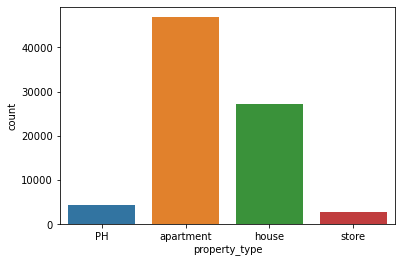

In [24]:
cat = sns.countplot(x='property_type', data=data)

Nos interesa conocer los porcentajes que representan cada una de estas propiedades:

In [25]:
data_tipo_de_prop = data.value_counts('property_type')

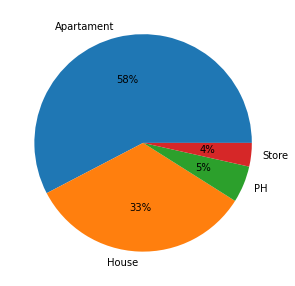

In [26]:
Means = pd.Series(data_tipo_de_prop) # serie de numeros
t_propiedades = ['Apartament', 'House', 'PH', 'Store'] # labels para cada numero

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(Means, labels = t_propiedades ,autopct='%1.f%%')
plt.show()

Vemos que el 92% de las propiedades se corresponden a: departamentos y casas, por tal motivo vamos a quedarnos solo con estas dos categorías

In [27]:
# mask_apartment = data.property_type == 'apartment'
# mask_house = data.property_type == 'house'
# mask_prop_type = mask_apartment | mask_house
data_ayh = data
data_ayh.shape

(81136, 17)

Veamos ahora sobre estas propiedades, como se distribuyen por "Provincia" (state_name), vamos a tomar los lugares que tengan al menos 1.000 datos

In [28]:
cantidades_por_estado = data_ayh.groupby('state_name')
data_ayh_estado = cantidades_por_estado.filter(lambda grp: grp["state_name"].value_counts() > 1000)
data_ayh_estado.head()

,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,..."


La columna place_name contiene el ultimo valor de la columna place_with_parent_names, por lo que en algunos valores son barrios , otros municipios y otros ciudades, y quisieramos dejar solo hasta la tercera desagregación y de nuevo nos quedamos con los grupos con mas de 1.000 datos. A fin de lograr esta desagregación se crea la columna `ciudad`

Para obtener la ciudad, creamos una función tomando como separador el símbolo |

In [29]:
def get_city_name(value):
    parts = value.split("|")
    if len(parts) == 4:
        result = parts[2]
    else:
        result = parts[3]
    return result

Llamamos a la funcion y creamos la columna

In [30]:
place_with_parent_names_series = data_ayh_estado.place_with_parent_names
city_replacement = [get_city_name(x) for x in place_with_parent_names_series]
data_ayh_estado["ciudad"] = city_replacement

In [31]:
data_ayh_estado.groupby(['state_name','ciudad']).size()

state_name                ciudad                  
Bs.As. G.B.A. Zona Norte  Bs.As. G.B.A. Zona Norte     222
                          Escobar                     1909
                          General San Martín          1582
                          José C Paz                   140
                          Malvinas Argentinas          489
                                                      ... 
Capital Federal           Villa Riachuelo                6
                          Villa Santa Rita              57
                          Villa Soldati                 15
                          Villa Urquiza               1629
                          Villa del Parque             488
Length: 93, dtype: int64

Dejamos ordenado el dataset para continuar con el analisis

In [32]:
data.shape

(81136, 17)

In [33]:
cantidades_por_ciudad = data_ayh_estado.groupby(['ciudad','state_name'])
cantidades_por_ciudad.size().sort_values(ascending = False).head(20)
data_ayh_ciudad = cantidades_por_ciudad.filter(lambda grp: grp["ciudad"].value_counts() > 1000)
data_ayh_ciudad.groupby(['ciudad','state_name']).size()
data_ayh_ciudad.reset_index(inplace = True)

In [34]:
data.shape

(81136, 17)

In [35]:
round(data_ayh_ciudad.isnull().sum() / data.shape[0] *100,0)

index                       0.0
property_type               0.0
place_name                  0.0
place_with_parent_names     0.0
state_name                  0.0
lat                        36.0
lon                        36.0
price                       8.0
surface_total_in_m2        22.0
surface_covered_in_m2       8.0
price_usd_per_m2           29.0
price_per_m2               14.0
floor                      72.0
rooms                      51.0
expenses                   66.0
properati_url               0.0
description                 0.0
title                       0.0
ciudad                      0.0
dtype: float64

---
### Expresiones Regulares

- Extraemos información de la columna descripción por medio de expresiones regulares
- Creamos una función que busque la palabra clave y genere una variable dummy

In [36]:
data_ayh_ciudad['description'] = data_ayh_ciudad['description'].astype(str)

In [37]:
def data_adic(pattern, columname, ifreturnvalue):
    patron = pattern
    ifreturn_value = ifreturnvalue
    regex = re.compile(patron, flags = re.IGNORECASE)
    resultado = data_ayh_ciudad["description"].apply(lambda x: ifreturnvalue if regex.search(x) == None else 1)
    data_ayh_ciudad[columname] = resultado
    
def data_adic_group(pattern,columname,group_name,ifreturnvalue):
    patron = pattern
    regex = re.compile(patron, flags = re.IGNORECASE)
    resultado = data_ayh_ciudad["description"].apply(lambda x: ifreturnvalue if regex.search(x) == None else regex.search(x).group(group_name))
    data_ayh_ciudad[columname] = resultado

In [38]:
data_adic('patio', 'Tiene_Patio', 0)

In [39]:
data_ayh_ciudad.loc[:,['description','Tiene_Patio']].sample(10)

,description,Tiene_Patio
36523,PLAZA CASARES3 ambientes. últimos disponibles....,0
39314,VENTA DEPARTAMENTO DE 2 AMBIENTES CON PATIO EN...,1
794,CODIGO: 018 ubicado en: AZOPARDO 197 - Public...,1
11426,Primer Piso por escalera Planta Baja: Living-...,0
58965,"Departamento 86m², Tigre, Tigre, por U$S 345.570",0
48085,"lindisimo depto duplex excelente estado , supe...",1
20771,CODIGO: 3246-JMV159 ubicado en: CJAL RAMELLA 3...,1
2197,1214 - Solido chalet compuesto por amplia rece...,0
41373,VENTA PH 4 AMBIENTES EN FLORIDA OESTEMuy buen...,1
29883,CONTAMOS CON TRES DEPARTAMENTOS A LA VENTA DE ...,0


- SE AGREGA UNA COLUMNA PARA ES EMPRENDIMIENTO

In [40]:
data_adic("((inversión)|(inversion)|(emprendimiento))","Es_Emprendimiento",0)


- SE AGREGA UNA COLUMNA CON LA CANTIDAD DE BAÑOS PARA RECUPERAR EL DATO DE LOS CASOS QUE SON NULOS

In [41]:
data_adic_group('(?P<cantidad>\d)\s(?P<busqueda>(baño|baños))','Cantidad_Baños','cantidad',1)
data_ayh_ciudad.Cantidad_Baños = data_ayh_ciudad.Cantidad_Baños.astype("int") 
data_ayh_ciudad

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,floor,rooms,expenses,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1
2,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,...,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,Belgrano,0,0,1
3,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,...,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,0,0,1
4,11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,San Miguel,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62584,121214,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,123.0,123.0,...,NaN,NaN,NaN,http://www.properati.com.ar/1cja1_venta_local_...,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,San Isidro,0,0,2
62585,121215,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,NaN,NaN,870000.0,113.0,93.0,...,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,Belgrano,0,0,1
62586,121216,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,NaN,498000.0,360.0,360.0,...,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,San Isidro,0,0,1
62587,121217,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,-34.570639,-58.475596,131500.0,46.0,39.0,...,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,Villa Urquiza,0,0,1


- SE AGREGA UNA COLUMNA PARA LA CANTIDAD DE HABITACIONES

In [42]:
data_adic_group('(?P<cantidad>\d)\s(?P<busqueda>(ambiente|habitaciones))','Cantidad_Habitaciones','cantidad',1)
data_ayh_ciudad.Cantidad_Habitaciones = data_ayh_ciudad.Cantidad_Habitaciones.astype("int") 

- SE RECUPERAN LOS MTS2 A TRAVÉS DE LA DESCRIPCION

In [43]:
data_adic_group('(?P<cantidad>(\d+,\d+)|(\d+))\s(?P<medida>(m2|mts|mx2|mts2))','Mts_2_Descripcion','cantidad',np.NaN)
data_ayh_ciudad.Mts_2_Descripcion

0        NaN
1        106
2        NaN
3        NaN
4        NaN
        ... 
62584    NaN
62585    NaN
62586    572
62587    NaN
62588     77
Name: Mts_2_Descripcion, Length: 62589, dtype: object

In [44]:
data_adic_group('(?P<palabra_clave>(Expensas))\s\$(?P<precio>(\d+,\d*)|(\d+))','Expensas','precio',0)
data_ayh_ciudad.Expensas = data_ayh_ciudad.Expensas.astype("str")
data_ayh_ciudad.Expensas = data_ayh_ciudad.Expensas.apply(lambda x: x.replace(",","."))
data_ayh_ciudad.Expensas = data_ayh_ciudad.Expensas.astype("float")
mask = data_ayh_ciudad.Expensas > 0
data_ayh_ciudad[mask].description

34       Departamento de 3 Ambientes al Contrafrente. S...
75       Corredor Responsable: Mariano Aufseher - CUCIC...
78       Corredor Responsable: Luis Alberto De Blas - C...
130      Corredor Responsable: SABRINA COCCONI - CSI 62...
177      Venta de Departamento de dos ambientes en San ...
                               ...                        
61907    Corredor Responsable: Fabiana Di Girolamo - CD...
62299                    3 ambientes con dependencia de...
62351                    Ph de 3 ambientes 1º piso por ...
62412    SEMIPISO Excelente y tranquilo   Hall de entra...
62436    DPTO. DE 2 AMBIENTES, BALCON 3X1, COMEDOR 5,00...
Name: description, Length: 930, dtype: object

In [45]:
data_ayh_ciudad.Mts_2_Descripcion = data_ayh_ciudad.Mts_2_Descripcion.astype("str")
data_ayh_ciudad.Mts_2_Descripcion = data_ayh_ciudad.Mts_2_Descripcion.apply(lambda x: x.replace(",","."))
data_ayh_ciudad.Mts_2_Descripcion = data_ayh_ciudad.Mts_2_Descripcion.astype("float")

In [46]:
data_ayh_ciudad.head()

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños,Cantidad_Habitaciones,Mts_2_Descripcion,Expensas
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1,1,NaN,0.0
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1,1,106.0,0.0
2,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,...,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,Belgrano,0,0,1,1,NaN,0.0
3,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,...,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,0,0,1,1,NaN,0.0
4,11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,NaN,NaN,...,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,San Miguel,0,0,1,1,NaN,0.0


Reemplazamos los datos faltantes con los datos extraidos de la descripcion para `surface_total_in_m2`

In [47]:
data_ayh_ciudad.surface_total_in_m2.fillna(data_ayh_ciudad.Mts_2_Descripcion, inplace = True)

Reemplazamos los datos faltantes con los datos extraidos de la descripcion para `expenses`

In [48]:
data_ayh_ciudad.expenses.fillna(data_ayh_ciudad.Expensas, inplace = True)

Reemplazamos los datos faltantes con los datos extraidos de la descripcion para `rooms`

In [49]:
data_ayh_ciudad.rooms.fillna(data_ayh_ciudad.Cantidad_Habitaciones, inplace = True)

Eliminamos las columnas temporales: **Mts_2_Descripcion, Expensas, Cantidad_Habitaciones**

In [50]:
data_ayh_ciudad = data_ayh_ciudad.drop(axis=1, columns=['Mts_2_Descripcion', 'Expensas', 'Cantidad_Habitaciones'])

In [51]:
#Vemos como nos queda el dataset
data_ayh_ciudad.head(2)

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,floor,rooms,expenses,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,NaN,1.0,0.0,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,NaN,1.0,0.0,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1


Calculamos la proporcion de nulos luego del reempazo

In [52]:
round(data_ayh_ciudad.isnull().sum() / data_ayh_ciudad.shape[0] * 100,0)

index                       0.0
property_type               0.0
place_name                  0.0
place_with_parent_names     0.0
state_name                  0.0
lat                        47.0
lon                        47.0
price                      11.0
surface_total_in_m2        22.0
surface_covered_in_m2      10.0
price_usd_per_m2           37.0
price_per_m2               18.0
floor                      93.0
rooms                       0.0
expenses                    0.0
properati_url               0.0
description                 0.0
title                       0.0
ciudad                      0.0
Tiene_Patio                 0.0
Es_Emprendimiento           0.0
Cantidad_Baños              0.0
dtype: float64

Se puede observar una reduccion significativa de la cantidad de nulos

---
## Datos Erróneos

Mostramos  cuántas instancias tienen errores en la superficie

In [53]:
wrong_surface_rows = data_ayh_ciudad.loc[(data_ayh_ciudad.surface_total_in_m2) < (data_ayh_ciudad.surface_covered_in_m2)]
wrong_surface_rows.shape

(2070, 22)

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [54]:
data_ayh_ciudad.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
data_ayh_ciudad.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

A continuación revisamos si las coordenadas de las propiedades contienen valores equivocados o bien duplicados

In [55]:
conteo_puntos = data_ayh_ciudad.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.402644  -58.668478    312
-34.400140  -58.649850    271
-34.642868  -58.437660    259
-34.425087  -58.579659    224
-34.589546  -58.397364    156
-34.571150  -58.423297    126
-34.425087  -58.579659    115
-34.562084  -58.456686    115
-34.477862  -58.909167    106
-34.629886  -58.463871     95
dtype: int64

Revisamos cuantas veces se duplican las coordenadas por cada propiedad agregando una columa llamada `conteo`

In [56]:
conteo_puntos.name = 'conteo'
data_ayh_ciudad=data_ayh_ciudad.join(conteo_puntos, on=['lat', 'lon'])

In [57]:
data_ayh_ciudad.head(7)

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,rooms,expenses,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños,conteo
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,1.0,0.0,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1,3.0
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,1.0,0.0,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1,1.0
2,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,...,1.0,0.0,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,Belgrano,0,0,1,2.0
3,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,...,1.0,0.0,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,0,0,1,2.0
4,11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,NaN,NaN,...,1.0,0.0,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,San Miguel,0,0,1,2.0
5,12,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,-34.486019,-58.503814,115000.0,39.0,36.0,...,2.0,0.0,http://www.properati.com.ar/15bp4_venta_depart...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,San Isidro,0,0,1,1.0
6,13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,50.0,30.0,...,1.0,0.0,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,Palermo,0,0,1,NaN


Para reducir la informacion duplicada, nos quedamos con las propiedades que se repitan hasta 5 veces

In [58]:
data_ayh_ciudad = data_ayh_ciudad[data_ayh_ciudad.conteo <= 5]

In [59]:
data_ayh_ciudad.head(7)

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,rooms,expenses,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños,conteo
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,1.0,0.0,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1,3.0
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,1.0,0.0,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1,1.0
2,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,...,1.0,0.0,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,Belgrano,0,0,1,2.0
3,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,...,1.0,0.0,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,0,0,1,2.0
4,11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,NaN,NaN,...,1.0,0.0,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,San Miguel,0,0,1,2.0
5,12,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,-34.486019,-58.503814,115000.0,39.0,36.0,...,2.0,0.0,http://www.properati.com.ar/15bp4_venta_depart...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,San Isidro,0,0,1,1.0
8,15,house,Bella Vista,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Bs.As. G.B.A. Zona Norte,-34.587911,-58.698783,250000.0,164.0,NaN,...,1.0,0.0,http://www.properati.com.ar/15bpd_venta_casa_b...,ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros...,HAUS VILLAGE / BELLA VISTA / 115m² MAS PATIO /...,San Miguel,1,0,1,1.0


Eliminamos el atributo `conteo` dado que ya no lo utilizaremos

In [60]:
data_ayh_ciudad.drop('conteo', inplace=True, axis=1)
data_ayh_ciudad

,index,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,...,floor,rooms,expenses,properati_url,description,title,ciudad,Tiene_Patio,Es_Emprendimiento,Cantidad_Baños
0,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,NaN,NaN,...,NaN,1.0,0.0,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,0,0,1
1,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,78.0,...,NaN,1.0,0.0,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",Vicente López,1,0,1
2,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,45.0,40.0,...,NaN,1.0,0.0,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,Belgrano,0,0,1
3,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,65.0,60.0,...,NaN,1.0,0.0,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,0,0,1
4,11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,-34.539057,-58.719609,150000.0,NaN,NaN,...,NaN,1.0,0.0,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,San Miguel,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62568,121151,apartment,Flores,|Argentina|Capital Federal|Flores|,Capital Federal,-34.629505,-58.460642,120000.0,NaN,72.0,...,NaN,1.0,6500.0,http://www.properati.com.ar/1cj5b_venta_depart...,"Departamento al frente con balcón, dos dormito...",Departamento - Flores,Flores,0,0,1
62570,121153,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Capital Federal,-34.599214,-58.402519,165000.0,91.0,65.0,...,NaN,1.0,0.0,http://www.properati.com.ar/1cj5g_venta_depart...,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...,EXCELENTE DEPARTAMENTO DE 3 AMBIENTES CON TERR...,Barrio Norte,0,0,1
62575,121158,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Capital Federal,-34.587425,-58.397372,165000.0,44.0,39.0,...,NaN,1.0,0.0,http://www.properati.com.ar/1cj5s_venta_depart...,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,Recoleta,0,1,1
62576,121160,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.563685,-58.442683,410000.0,157.0,NaN,...,NaN,1.0,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,Belgrano,0,0,1


---
## Imputación de datos faltantes

Antes de comenzar con la limpieza, queremos saber que porcentaje de nulos hay por cada variable

In [61]:
round(data_ayh_ciudad.isnull().sum() / data_ayh_ciudad.shape[0] *100,0)

index                       0.0
property_type               0.0
place_name                  0.0
place_with_parent_names     0.0
state_name                  0.0
lat                         0.0
lon                         0.0
price                      10.0
surface_total_in_m2        23.0
surface_covered_in_m2      12.0
price_usd_per_m2           38.0
price_per_m2               19.0
floor                      91.0
rooms                       0.0
expenses                    0.0
properati_url               0.0
description                 0.0
title                       0.0
ciudad                      0.0
Tiene_Patio                 0.0
Es_Emprendimiento           0.0
Cantidad_Baños              0.0
dtype: float64

Vemos que el 38% del valor por mt2 con valores faltantes, en principio podriamos clacularlo con el precio y la superfice total o cubierta, vamos a ver si esos datos nos sirven.

- Se agrega una columna con el cálculo de precio por metro cuadrado, utilizando los precios y mts2 existentes

In [62]:
data_ayh_ciudad['price_usd_per_m2_aprox'] = data_ayh_ciudad.price / data_ayh_ciudad.surface_total_in_m2

- Se reemplaza con el nuevo valor calculado

In [63]:
data_ayh_ciudad.price_usd_per_m2.fillna(data_ayh_ciudad.price_usd_per_m2_aprox, inplace = True)

- Se chequean cuantos datos quedaron nulos luego del reemplazo

In [64]:
round(data_ayh_ciudad.isnull().sum() / data_ayh_ciudad.shape[0] * 100,0)

index                       0.0
property_type               0.0
place_name                  0.0
place_with_parent_names     0.0
state_name                  0.0
lat                         0.0
lon                         0.0
price                      10.0
surface_total_in_m2        23.0
surface_covered_in_m2      12.0
price_usd_per_m2           30.0
price_per_m2               19.0
floor                      91.0
rooms                       0.0
expenses                    0.0
properati_url               0.0
description                 0.0
title                       0.0
ciudad                      0.0
Tiene_Patio                 0.0
Es_Emprendimiento           0.0
Cantidad_Baños              0.0
price_usd_per_m2_aprox     30.0
dtype: float64

Vemos que se redujo a un 30% la cantidad de valores nulos para precio por m2. 

In [65]:
data_ayh_ciudad.dropna(subset=['price_usd_per_m2'], inplace=True)

Volvemos a revisar el dataset luego de eliminar los nulos

In [66]:
round(data_ayh_ciudad.isnull().sum() / data_ayh_ciudad.shape[0] * 100,0)

index                       0.0
property_type               0.0
place_name                  0.0
place_with_parent_names     0.0
state_name                  0.0
lat                         0.0
lon                         0.0
price                       0.0
surface_total_in_m2         0.0
surface_covered_in_m2       7.0
price_usd_per_m2            0.0
price_per_m2                7.0
floor                      92.0
rooms                       0.0
expenses                    0.0
properati_url               0.0
description                 0.0
title                       0.0
ciudad                      0.0
Tiene_Patio                 0.0
Es_Emprendimiento           0.0
Cantidad_Baños              0.0
price_usd_per_m2_aprox      0.0
dtype: float64

---
## Outliers

La idea general es poder determinar aquellos valores atipicos en el dataset y removerlos a fin de tener un conjunto de datos libre de valores que, al ser extremos, pueden ser considerados como valores erroneos

Veamos los outliers por ciudad:

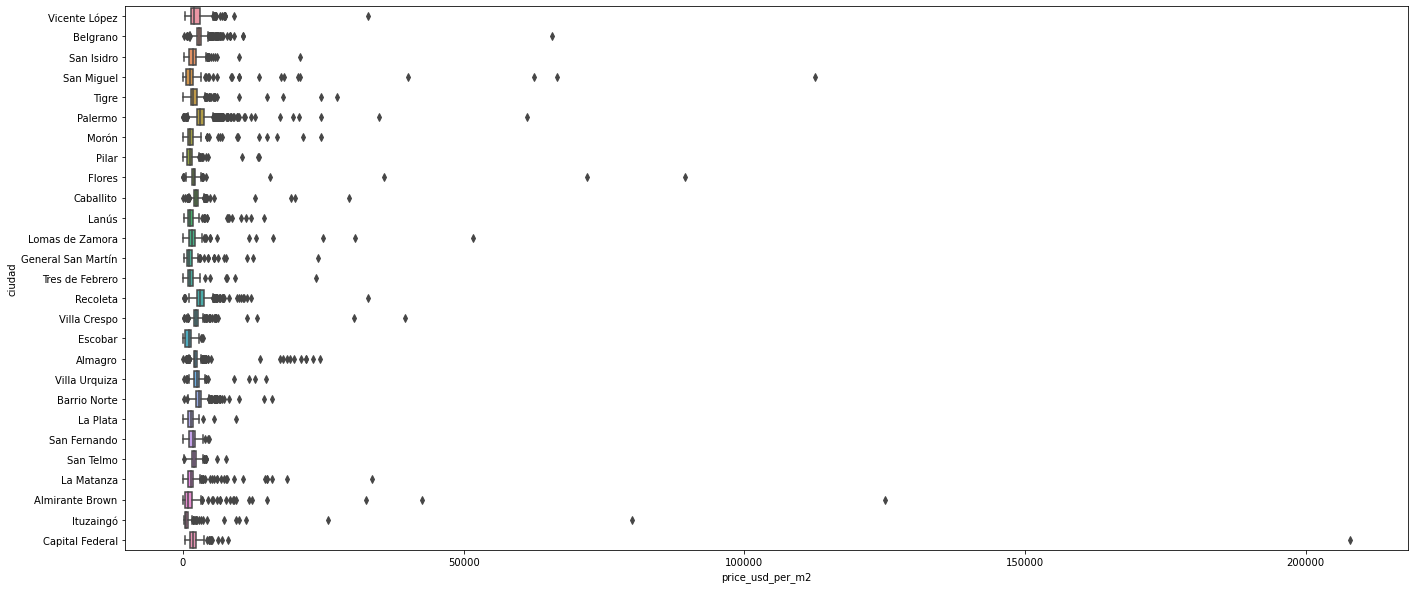

In [67]:
plt.figure(figsize=(23, 10))
sns.boxplot(y="ciudad", x="price_usd_per_m2", data=data_ayh_ciudad)
plt.show()

Vemos en el dataset los datos relacionados a los valores extremos

In [68]:
data_ayh_ciudad.pivot_table(index='ciudad', columns='property_type'
                            ,aggfunc={'price_usd_per_m2': [np.mean, np.std, np.max,np.min]})

price_usd_per_m2                                            \
                               amax                                             
property_type                    PH     apartment         house         store   
ciudad                                                                          
Almagro                2.738095e+03  2.438780e+04  2.306452e+04  1.369863e+04   
Almirante Brown        9.800000e+02  4.250000e+04  1.250000e+05  9.000000e+03   
Barrio Norte           3.333333e+03           inf  3.000000e+03  1.583333e+04   
Belgrano               3.153846e+03  1.065891e+04  6.666667e+03  6.566667e+04   
Caballito              3.630435e+03           inf  2.950000e+04  5.500000e+03   
Capital Federal        2.191176e+03  4.600000e+03  7.994924e+03  2.078522e+05   
Escobar                1.672974e+03  2.782609e+03  3.560000e+03  2.566667e+03   
Flores                 7.194444e+04  3.578378e+04  8.947368e+04  1.543210e+04   
General San Martín     1.133333e+04  1.250000e+04           inf  7.317073e+03   
Ituzaingó              2.812500e+03  3.142857e+03  8.000000e+04  1.000000e+03   
La Matanza             1.454545e+04  7.800000e+03  3.365021e+04  7.730365e+03   
La Plata               2.375000e+03  5.542169e+03  9.500000e+03  2.744932e+03   
Lanús                  3.950000e+03  2.809524e+03  1.210938e+04  1.444444e+04   
Lomas de Zamora        1.600000e+04  3.364486e+03  5.166667e+04  1.300000e+04   
Morón                  2.142857e+04           inf           inf  6.666667e+03   
Palermo                4.768116e+03           inf  6.125000e+04  3.495000e+04   
Pilar                  1.178571e+03  1.342482e+04           inf  4.411765e+03   
Recoleta               3.780000e+03           inf  4.047619e+03  1.203501e+04   
San Fernando           2.977778e+03  4.625000e+03  4.000000e+03  4.375000e+03   
San Isidro             2.804878e+03  5.266667e+03  2.075000e+04  6.000000e+03   
San Miguel                      inf           inf           inf           inf   
San Telmo              1.973684e+03  5.989583e+03  7.619048e+03  2.597403e+03   
Tigre                  1.769231e+03  2.454545e+04  2.750000e+04  5.050505e+03   
Tres de Febrero        2.666667e+03  2.375000e+04  9.250000e+03  7.570978e+03   
Vicente López          4.352941e+03           inf  3.300000e+04  4.838710e+03   
Villa Crespo           3.500000e+03  4.180000e+03  2.556270e+03  3.950000e+04   
Villa Urquiza          3.460000e+03  1.475000e+04  1.275862e+04  3.600000e+03   

                                                                        \
                           amin                                          
property_type                PH    apartment        house        store   
ciudad                                                                   
Almagro              467.796610    70.512821   555.555556   983.050847   
Almirante Brown      772.727273   171.428571    50.000000    69.239095   
Barrio Norte        2076.923077   120.891333  1384.615385   970.149254   
Belgrano            1350.000000   217.098065  1000.000000  1222.222222   
Caballito            643.776824    26.168224   288.888889   769.230769   
Capital Federal      450.236967  1141.025641   350.140056   375.000000   
Escobar              355.652520   725.788706    24.159108  2205.882353   
Flores               594.479830    69.381856    65.997424   666.666667   
General San Martín   214.285714   457.831325   133.333333   328.125000   
Ituzaingó            252.837300   660.000000   104.938272   833.333333   
La Matanza           326.666667    88.131429    22.563177   126.666667   
La Plata              91.324201   144.215143    20.190120   384.615385   
Lanús                200.000000   375.000000   199.530516   270.588235   
Lomas de Zamora       50.475300   150.000000   140.209150    64.516129   
Morón                228.489037    20.898642    35.294118   750.000000   
Palermo              992.907801    54.750000  1086.363636     0.473631   
Pilar                464.50

Como puede observarse arriba la mayor cantidad de valores atípicos se encuentran por encima de los 10.000 usd, teniendo esto en cuenta lo tomamos como limite, aquellas propiedades que superen los 10.000 usd por metro cuadrado serán descartadas, pero
antes queremos ver cuantos casos extremos tenemos

In [69]:
precio_x_mt2_lim = 10000

In [70]:
mask_outliers = data_ayh_ciudad.price_usd_per_m2 > precio_x_mt2_lim
print("Casos Extremos:", data_ayh_ciudad.loc[mask_outliers].shape[0])
data_ayh_ciudad.loc[mask_outliers, 
                    ['place_name','property_type','surface_total_in_m2','surface_covered_in_m2',
                    'price','price_usd_per_m2']].sort_values(by = 'price_usd_per_m2' , ascending = False)

Casos Extremos: 222


,place_name,property_type,surface_total_in_m2,surface_covered_in_m2,price,price_usd_per_m2
89,Castelar,house,0.00,NaN,180000.00,inf
13211,San Miguel,apartment,0.00,NaN,49914.47,inf
17620,San Miguel,house,0.00,NaN,200000.00,inf
17870,Caballito,apartment,0.00,NaN,68500.00,inf
90,Castelar,house,0.00,NaN,350000.00,inf
...,...,...,...,...,...,...
25878,Belgrano,apartment,516.00,456.0,5500000.00,1.065891e+04
25963,Belgrano,apartment,517.00,456.0,5500000.00,1.063830e+04
12559,Pilar,apartment,35.00,35.0,365000.00,1.042857e+04
40007,Lanús,house,17.32,NaN,180000.00,1.039261e+04


Procedemos a remover esos valores 

In [71]:
mask_precio_x_mt2_sin_out =data_ayh_ciudad.price_usd_per_m2 < precio_x_mt2_lim
data_ayh_ciudad = data_ayh_ciudad.loc[mask_precio_x_mt2_sin_out]

Volvemos a plotear el grafico

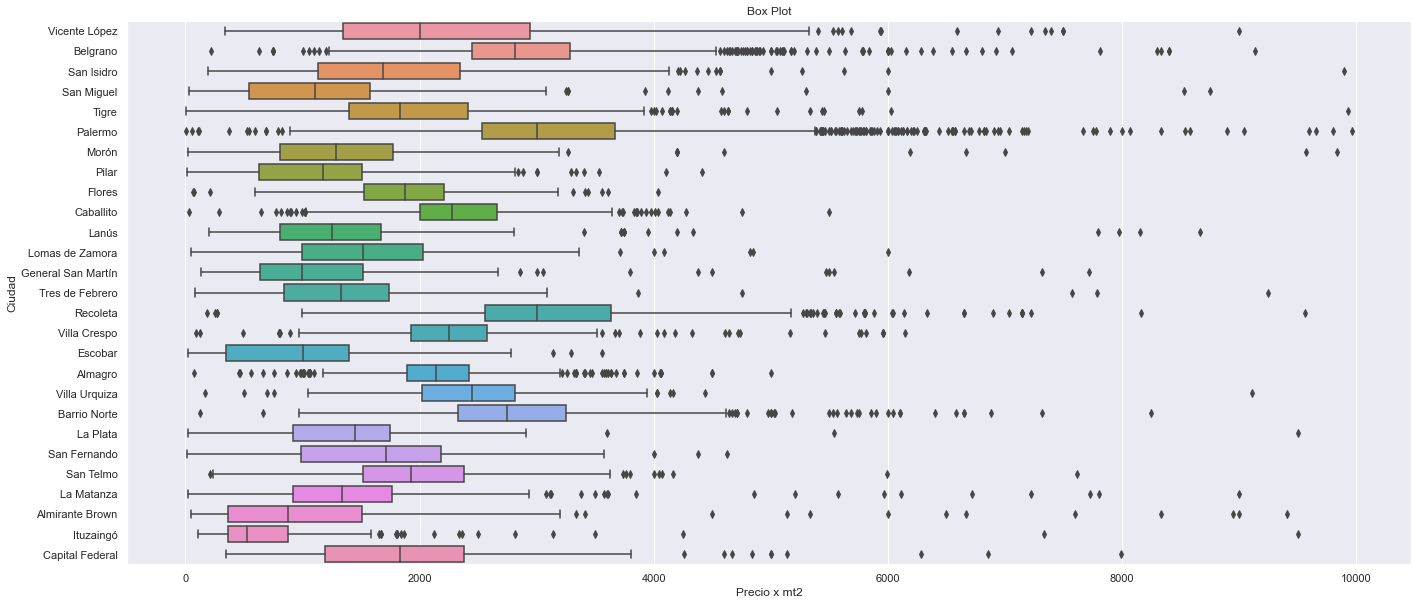

In [72]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))
sns.boxplot(y="ciudad", x="price_usd_per_m2", data=data_ayh_ciudad)
plt.xlabel("Precio x mt2"); plt.ylabel("Ciudad");plt.title("Box Plot")
plt.show()

---
## Ciudades mas caras y mas baratas

Nos interesa entender la distribución del precio por metro cuadrado para todo el dataset ya procesado.

- Calculamos el precio maximo, minimo, la media, la mediana y el desvio standard

In [73]:
min_price = data_ayh_ciudad.price_usd_per_m2.min()
max_price = data_ayh_ciudad.price_usd_per_m2.max()
mean_price = data_ayh_ciudad.price_usd_per_m2.mean()
median_price = data_ayh_ciudad.price_usd_per_m2.median()
std_price = data_ayh_ciudad.price_usd_per_m2.std()

print("Precio minimo:", min_price)
print("Precio maximo:", max_price)
print("Precio promedio:", mean_price)
print("Precio mediano:", median_price)
print("Desvio standard:", std_price)

Precio minimo: 0.47363134820710306
Precio maximo: 9966.666666666666
Precio promedio: 2018.6063841730866
Precio mediano: 1917.8082191780825
Desvio standard: 1161.0620371125387


- Calculamos el rango intercuartilico

In [74]:
q1 = data_ayh_ciudad.price_usd_per_m2.quantile(0.25)
q2 = data_ayh_ciudad.price_usd_per_m2.quantile(0.75)
iqr = q2 - q1

print("Primer Quartil =", q1)
print("Segundo Quartil =", q2)
print("Rango intercuartilico =", iqr)

Primer Quartil = 1230.7692307692307
Segundo Quartil = 2632.6530612244896
Rango intercuartilico = 1401.883830455259


- Vemos cuales son los lugares mas caros

In [75]:
table = pd.pivot_table(data_ayh_ciudad, values='price_usd_per_m2', index=['ciudad'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
ciudad,
Palermo,3271.528597
Recoleta,3190.706505
Belgrano,2939.787605
Barrio Norte,2910.001371
Villa Urquiza,2424.107263


- Vemos cuales son los lugares mas baratos

In [76]:
table = pd.pivot_table(data_ayh_ciudad, values='price_usd_per_m2', index=['ciudad'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
ciudad,
Ituzaingó,758.778066
Escobar,966.874975
Pilar,1145.353895
General San Martín,1148.037145
San Miguel,1148.979480


---
## Graficando propiedades de los barrios

Una vez calculados cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en mt2
- Cantidad de Ambientes 
- Precio en dolares por mt2

In [77]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [78]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

- Superficie total en mts2

C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


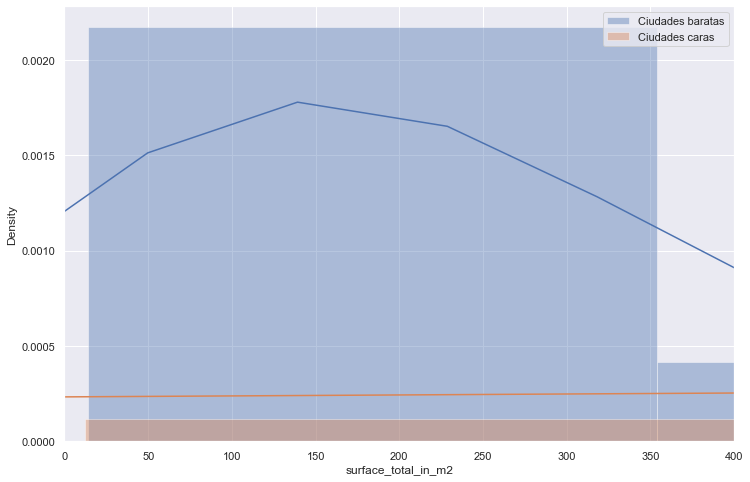

In [79]:
g = sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_baratos)].surface_total_in_m2, label="Ciudades baratas")
sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_caros)].surface_total_in_m2, label="Ciudades caras")
g.set_xlim(0, 400)
plt.legend()

- Cantidad de ambientes

C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


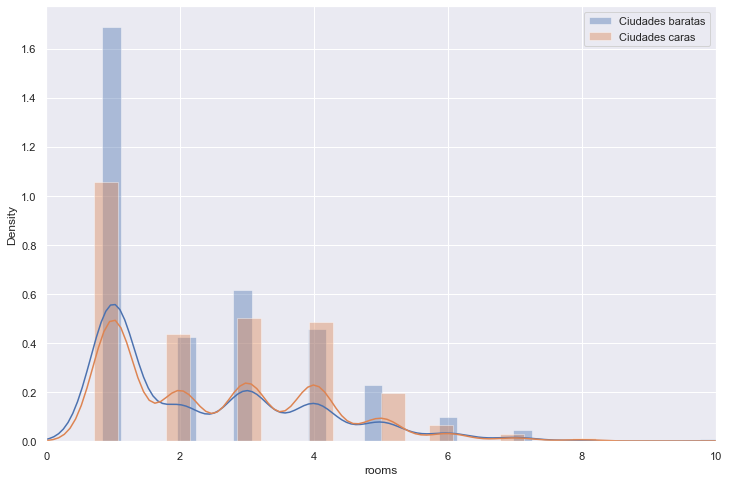

In [80]:
g = sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_baratos)].rooms, label="Ciudades baratas")
sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_caros)].rooms, label="Ciudades caras")
g.set_xlim(0, 10)
plt.legend()

- Precio x mt2

C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cristian_torres\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


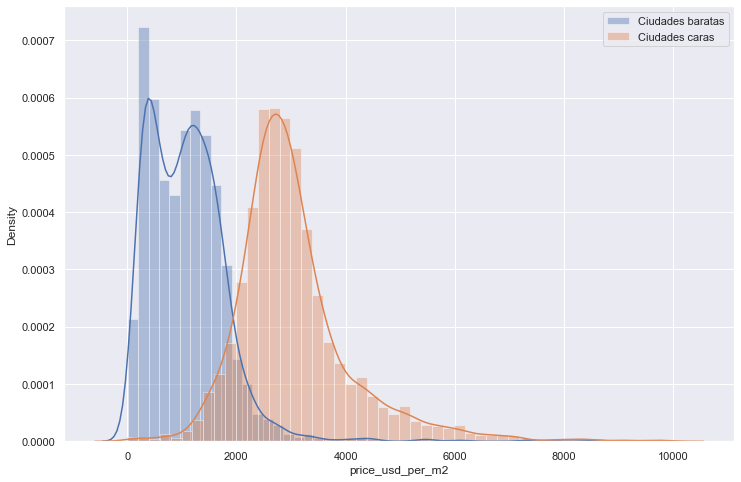

In [81]:
g = sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_baratos)].price_usd_per_m2, label="Ciudades baratas")
sns.distplot(data_ayh_ciudad[data_ayh_ciudad.ciudad.isin(barrios_caros)].price_usd_per_m2, label="Ciudades caras")
plt.legend()

---
## Exportamos el dataset procesado

Por último exportamos el dataset sobre el cual se hicieron las transformaciones

In [83]:
data_ayh_ciudad.to_csv('properati_cleaned.csv')